# GRAPHS

In [110]:
from cube_fil_finder.vis import tree_vis
from cube_fil_finder.structs import util as struct_util
from cube_fil_finder.galfa import galfa_const
from cube_fil_finder.galfa import galfa_util
from cube_fil_finder.util import moments
from cube_fil_finder.util.moments import ROUNDNESS_AR_CONVERSION as AR2ROUND
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle
import pprint

%matplotlib inline

### loading trees

In [3]:
pickle_path_all_trees = '../../pickled_dicts/fourth_batch/all_trees_1_8.p' 
all_trees = pickle.load(open(pickle_path_all_trees, 'rb'))

# Sky maps

### Distribution

/Users/larryli/anaconda/envs/py27research/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


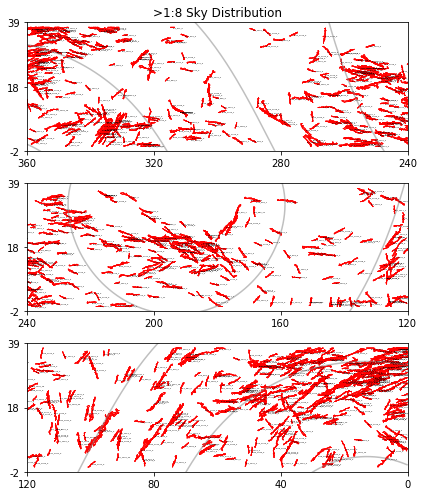

In [3]:
fig_sky_dist = tree_vis.vis_trees_sky_dist_names_3_panels(all_trees, '>1:8', return_fig=True)
fig_sky_dist.show()

In [5]:
fig_sky_dist.savefig('../../vis/all_sky_maps_fourth_batch/sky_distribution_with_name.pdf')

### loading tree properties

In [56]:
pickle_path_all_tree_prop = '../../pickled_dicts/fourth_batch/all_trees_1_8_prop.p'
all_tree_prop = pickle.load(open(pickle_path_all_tree_prop, 'rb'))

In [57]:
# sample tree has fields:
sample_tree_prop = all_tree_prop['3100_1007_0'].keys()
sample_tree_prop.sort()
pprint.pprint(sample_tree_prop)

['average_velocity',
 'column_density_mean',
 'column_density_mean_raw',
 'column_density_median',
 'column_density_median_raw',
 'column_density_peak',
 'column_density_peak_raw',
 'key_num',
 'l_b',
 'moment_0_mean',
 'moment_0_mean_raw',
 'moment_0_median',
 'moment_0_median_raw',
 'moment_0_peak',
 'moment_0_peak_raw',
 'moment_1_mean',
 'moment_1_median',
 'moment_2_mean',
 'moment_2_median',
 'moment_2_peak',
 'ra_dec',
 'roundness',
 'size',
 'starting_velocity',
 'velocity_span',
 'width_chisq',
 'width_chisq_raw',
 'width_err',
 'width_err_raw',
 'width_fit',
 'width_fit_raw']


## loading cataloge

In [58]:
data_file_path = '../../data_out/fourth_batch_all_prop.txt'
data = np.loadtxt(data_file_path, delimiter=',')

In [59]:
key_nums = data[:, 0]
ras = data[:, 1]
decs = data[:, 2]
ls = data[:, 3]
bs = data[:, 4]
sizes = data[:, 5]
roundnesses = data[:, 6]
starting_velocities = data[:, 7]
velocity_spans = data[:, 8]
average_velocities = data[:, 9]
moment_0_means = data[:, 10]
moment_0_medians = data[:, 11]
moment_0_peaks = data[:, 12]
moment_0_means_raw = data[:, 13]
moment_0_medians_raw = data[:, 14]
moment_0_peaks_raw = data[:, 15]
moment_1_means = data[:, 16]
moment_1_medians = data[:, 17]
moment_2_means = data[:, 18]
moment_2_medians = data[:, 19]
moment_2_peaks = data[:, 20]
column_density_means = data[:, 21]
column_density_medians = data[:, 22]
column_density_peaks = data[:, 23]
column_density_means_raw = data[:, 24]
column_density_medians_raw = data[:, 25]
column_density_peaks_raw = data[:, 26]
width_fits = data[:, 27]
width_errs = data[:, 28]
width_chisq = data[:, 29]
width_fits_raw = data[:, 30]
width_errs_raw = data[:, 31]
width_chisq_raw = data[:, 32]

# distributions

In [60]:
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams.update({'font.size': 12})

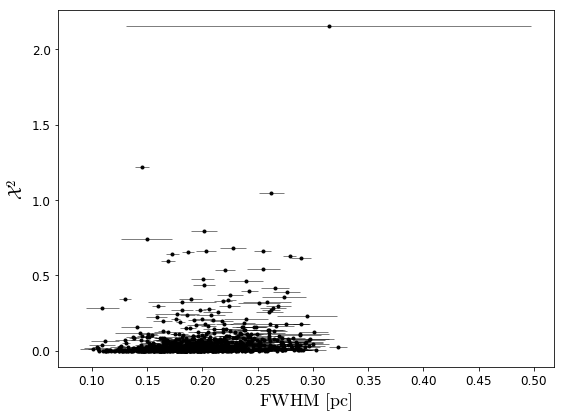

In [61]:
fig_chisq, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

ax.errorbar(width_fits_raw, width_chisq_raw, xerr=width_errs_raw, fmt='.', color='black', linewidth=.5)
ax.set_ylabel(r'$\mathcal{X}^2$', fontsize=18)
ax.set_xlabel(r'$\mathrm{FWHM\ [pc]}$', fontsize=18)
fig_chisq.tight_layout()
fig_chisq.show()

In [62]:
fig_chisq.savefig('../../vis/all_sky_maps_fourth_batch/FWHM_vs_chisq.pdf')

### RA & DEC dist

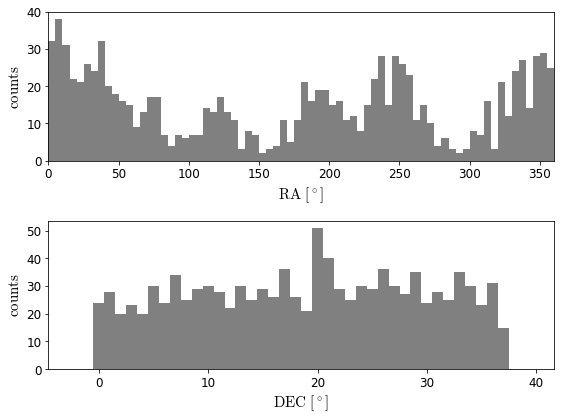

In [63]:
fig_ra_dec, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(8,6))

ax1.hist(ras, np.arange(0,361, 5), color='grey')

ax1.set_xlim([0,360])
ax1.set_xlabel(r'$\mathrm{RA}\ [^\circ]$', fontsize=15)
ax1.set_ylabel(r'$\mathrm{counts}$', fontsize=15)

ax2.hist(decs, np.arange(-2.5,40.5, 1), color='grey')

ax2.set_xlabel(r'$\mathrm{DEC}\ [^\circ]$', fontsize=15)
ax2.set_ylabel(r'$\mathrm{counts}$', fontsize=15)

fig_ra_dec.tight_layout()
fig_ra_dec.show()

In [64]:
fig_ra_dec.savefig('../../vis/all_sky_maps_fourth_batch/ra_dec_dist.pdf')

### roundness distribution

In [185]:
ar_key = {'1_8': '1:8',
          '1_9': '1:9',
          '1_10': '1:10',
          '1_11': '1:11',
          '1_12': '1:12',
          '1_13': '1:13',
          '1_14': '1:14',
          '1_16': '1:16'}

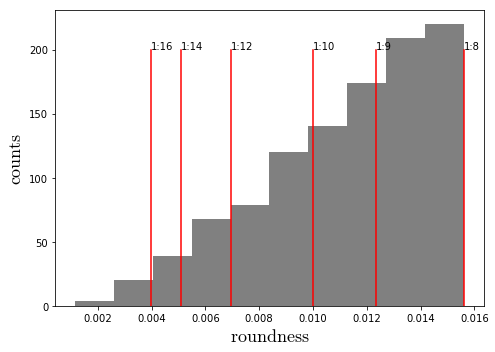

In [186]:
fig_roundess_hist, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,5))

ax.hist(roundnesses, color='grey')

ax.set_ylabel(r'$\mathrm{counts}$', fontsize=18)
ax.set_xlabel(r'$\mathrm{roundness}$', fontsize=18)
for k in ['1_8', '1_9', '1_10', '1_12', '1_14', '1_16']:
    ax.plot([moments.ROUNDNESS_AR_CONVERSION[k], moments.ROUNDNESS_AR_CONVERSION[k]],
            [0, 200], color='red')
    ax.text(moments.ROUNDNESS_AR_CONVERSION[k], 200, ar_key[k])

fig_roundess_hist.tight_layout()
fig_roundess_hist.show()

In [66]:
fig_roundess_hist.savefig('../../vis/all_sky_maps_fourth_batch/roundness_hist.pdf')

### width histograms

In [74]:
for k in all_tree_prop:
    if all_tree_prop[k]['width_fit_raw'] > 0.3:
        print(k)

3257_955_0
593_1021_5
666_1021_5
880_1025_4


In [75]:
for k in all_tree_prop:
    if all_tree_prop[k]['width_fit_raw'] < 0.1:
        print(k)

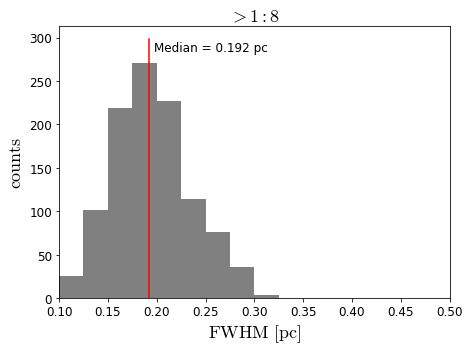

In [77]:
fig_width_hist, ax1, = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

bins = np.arange(.1, .5, .025)

n_1_8, _, _ = ax1.hist(width_fits_raw, bins, color='grey')
ax1.plot([np.nanmedian(width_fits_raw), np.nanmedian(width_fits_raw)], [0, max(n_1_8) * 1.1], color='red')
ax1.text(np.nanmedian(width_fits_raw) + .005, max(n_1_8) * 1.05,
         'Median = {0:0.3f} pc'.format(np.nanmedian(width_fits_raw)), fontsize=12)
ax1.set_title(r'$>1:8$', fontsize=18)
#print(np.nanstd(width_fits))

ax1.set_xlim(0.1, .5)
#ax1.set_ylim(0, 330)
ax1.set_xlabel(r'$\mathrm{FWHM\ [pc]}$', fontsize=18)
ax1.set_ylabel(r'$\mathrm{counts}$', fontsize=18)

fig_width_hist.show()

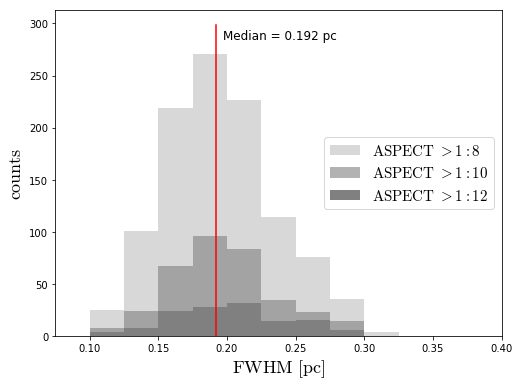

In [329]:
fig_width_hist, ax1, = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

idx1 = (roundnesses < AR2ROUND['1_10'])
idx2 = (roundnesses < AR2ROUND['1_12'])

bins = np.arange(.1, .4, .025)

n_1_8, _, _ = ax1.hist(width_fits_raw, bins, color='grey', alpha=.3, label=r'$\mathrm{ASPECT}\ > 1:8$')
_, _, _ = ax1.hist(width_fits_raw[idx1], bins, color='grey', alpha=.6, label=r'$\mathrm{ASPECT}\ > 1:10$')
_, _, _ = ax1.hist(width_fits_raw[idx2], bins, color='grey', alpha=1, label=r'$\mathrm{ASPECT}\ > 1:12$')
ax1.legend(loc='center right', fontsize=15)
ax1.plot([np.nanmedian(width_fits_raw), np.nanmedian(width_fits_raw)], [0, max(n_1_8) * 1.1], color='red')
ax1.text(np.nanmedian(width_fits_raw) + .005, max(n_1_8) * 1.05,
         'Median = {0:0.3f} pc'.format(np.nanmedian(width_fits_raw)), fontsize=12)

ax1.set_xlim(0.075, .4)
#ax1.set_ylim(0, 45)
ax1.set_xlabel(r'$\mathrm{FWHM\ [pc]}$', fontsize=18)
ax1.set_ylabel(r'$\mathrm{counts}$', fontsize=18)

fig_width_hist.show()

In [330]:
fig_width_hist.savefig('../../vis/all_sky_maps_fourth_batch/FWHM_hist.pdf')

### width vs b

#### it's interesting to play with the b_cut here

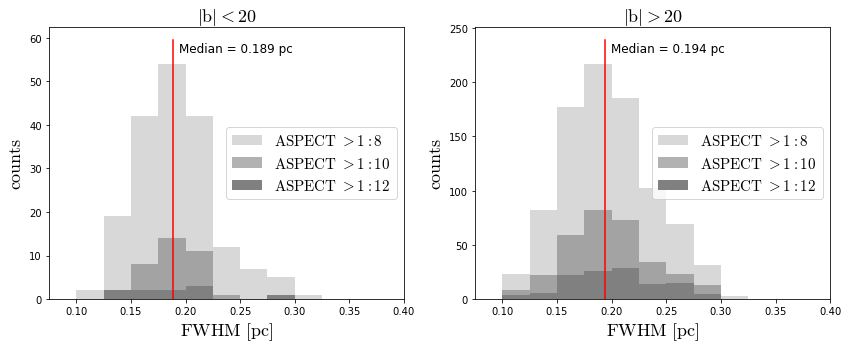

In [333]:
b_cut = 20

fig_width_hist_bs, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

idxa = np.abs(bs) < b_cut
idxb = np.abs(bs) > b_cut
idx1a = ((roundnesses < moments.ROUNDNESS_AR_CONVERSION['1_10']) & (np.abs(bs) < b_cut))
idx1b = ((roundnesses < moments.ROUNDNESS_AR_CONVERSION['1_10']) & (np.abs(bs) > b_cut))
idx2a = ((roundnesses < moments.ROUNDNESS_AR_CONVERSION['1_12']) & (np.abs(bs) < b_cut))
idx2b = ((roundnesses < moments.ROUNDNESS_AR_CONVERSION['1_12']) & (np.abs(bs) > b_cut))

bins = np.arange(.1, .4, .025)

#nanfwhm = [w for w in fwhm if not np.isnan(w)]

n_1_8, _, _ = ax1.hist(width_fits_raw[idxa], bins, color='grey', alpha=.3, label=r'$\mathrm{ASPECT}\ > 1:8$')
_, _, _ = ax1.hist(width_fits_raw[idx1a], bins, color='grey', alpha=.6, label=r'$\mathrm{ASPECT}\ > 1:10$')
_, _, _ = ax1.hist(width_fits_raw[idx2a], bins, color='grey', alpha=1, label=r'$\mathrm{ASPECT}\ > 1:12$')
ax1.plot([np.nanmedian(width_fits_raw[idxa]), np.nanmedian(width_fits_raw[idxa])], [0, max(n_1_8) * 1.1], color='red')
ax1.text(np.nanmedian(width_fits_raw[idxa]) + .005, max(n_1_8) * 1.05,
         'Median = {0:0.3f} pc'.format(np.nanmedian(width_fits_raw[idxa])), fontsize=12)
ax1.set_title(r'$\mathrm{|b|}< 20$', fontsize=18)

n_1_8, _, _ = ax2.hist(width_fits_raw[idxb], bins, color='grey', alpha=.3, label=r'$\mathrm{ASPECT}\ > 1:8$')
_, _, _ = ax2.hist(width_fits_raw[idx1b], bins, color='grey', alpha=.6, label=r'$\mathrm{ASPECT}\ > 1:10$')
_, _, _ = ax2.hist(width_fits_raw[idx2b], bins, color='grey', alpha=1, label=r'$\mathrm{ASPECT}\ > 1:12$')
ax2.plot([np.nanmedian(width_fits_raw[idxb]), np.nanmedian(width_fits_raw[idxb])], [0, max(n_1_8) * 1.1], color='red')
ax2.text(np.nanmedian(width_fits_raw[idxb]) + .005, max(n_1_8) * 1.05,
         'Median = {0:0.3f} pc'.format(np.nanmedian(width_fits_raw[idxb])), fontsize=12)
ax2.set_title(r'$\mathrm{|b|}> 20$', fontsize=18)

#ax1.set_xlim(0.1, .5)
#ax1.set_ylim(0, 330)
for ax in [ax1, ax2]:
    ax.set_xlabel(r'$\mathrm{FWHM\ [pc]}$', fontsize=18)
    ax.set_ylabel(r'$\mathrm{counts}$', fontsize=18)
    ax.set_xlim(0.075, 0.4)
    ax.legend(loc='center right', fontsize=15)

fig_width_hist_bs.show()

In [334]:
fig_width_hist_bs.savefig('../../vis/all_sky_maps_fourth_batch/FWHM_hist_bs.pdf')

### med velocity

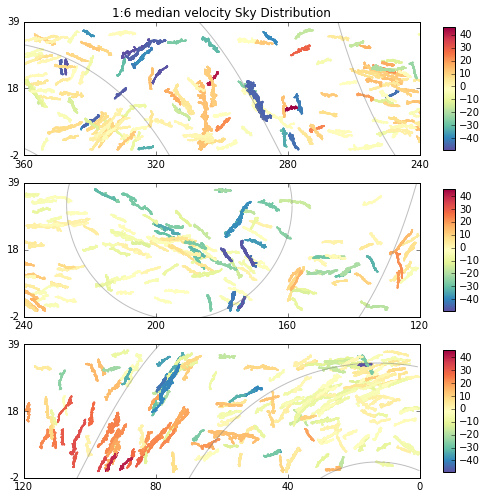

In [180]:
med_v_color = {}
for i in range(len(tree_keys_sorted_area)):
    med_v_color[tree_keys_sorted_area[i]] = m1_median[i] 
fig_sky_dist_mid_v = tree_vis.vis_trees_sky_dist_color_range_3_panels(all_trees, '1:6 Median Velocity', med_v_color, 'Spectral_r', return_fig=True)
fig_sky_dist_mid_v.show()

In [181]:
fig_sky_dist_mid_v.savefig('../vis/all_sky_maps_fin/sky_distribution_median_velocity.pdf')

### velocity span

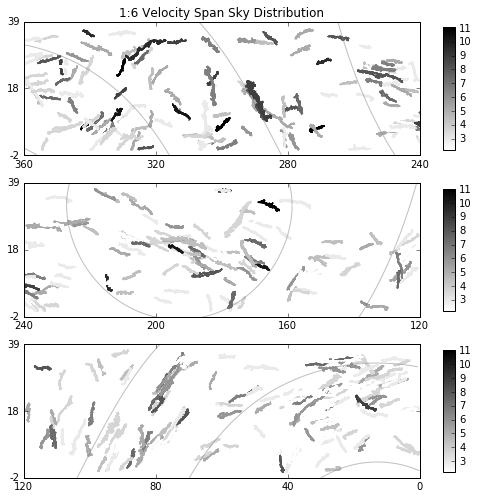

In [182]:
v_span_color = {}
for i in range(len(tree_keys_sorted_area)):
    v_span_color[tree_keys_sorted_area[i]] = v_span[i] 
fig_sky_dist_v_span = tree_vis.vis_trees_sky_dist_color_range_3_panels(all_trees, '1:6 Velocity Span', v_span_color, 'binary', return_fig=True)
fig_sky_dist_v_span.show()

In [184]:
fig_sky_dist_v_span.savefig('../vis/all_sky_maps_fin/sky_distribution_velocity_span.pdf')

### width 

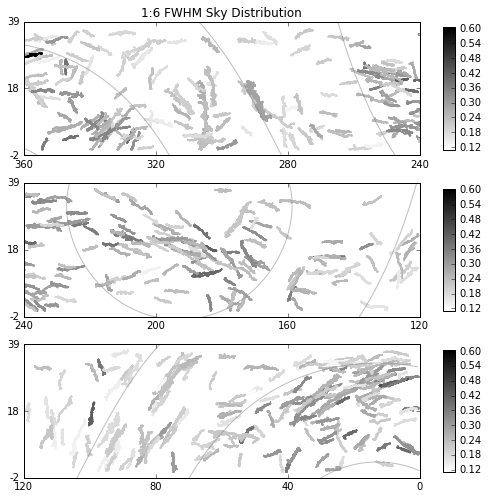

In [183]:
fwhm_color = {}
for i in range(len(tree_keys_sorted_area)):
    fwhm_color[tree_keys_sorted_area[i]] = fwhm[i] 
fig_sky_dist_fwhm = tree_vis.vis_trees_sky_dist_color_range_3_panels(all_trees, '1:6 FWHM', fwhm_color, 'binary', return_fig=True)
fig_sky_dist_fwhm.show()

In [185]:
fig_sky_dist_fwhm.savefig('../vis/all_sky_maps_fin/sky_distribution_fwhm.pdf')

### width vs b

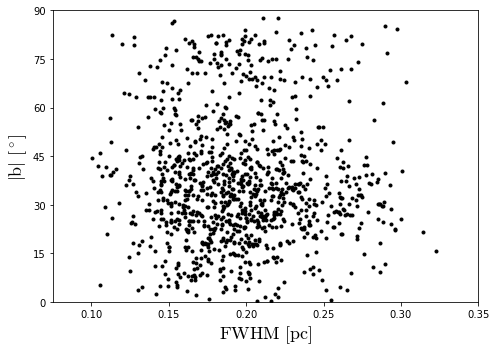

In [336]:
fig_width_b_abs, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))

ax.scatter(width_fits_raw, np.abs(bs), marker='.', color='black')

ax.set_ylabel(r'$\mathrm{|b|}\ [^\circ]$', fontsize=18)
ax.set_xlabel(r'$\mathrm{FWHM\ [pc]}$', fontsize=18)

ax.set_ylim([0, 90])
ax.set_xlim([0.075, 0.35]) # consistent with histograms

ax.set_yticks(np.linspace(0, 90, 7))
#ax.set_xticks(np.arange(0.1, 0.65, .1))

fig_width_b_abs.tight_layout()
fig_width_b_abs.show()

In [337]:
fig_width_b_abs.savefig('../../vis/all_sky_maps_fourth_batch/FWHM_vs_b_abs.pdf')

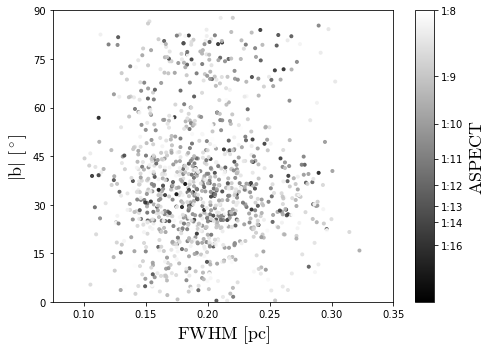

In [338]:
fig_width_b_abs, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))

ax.scatter(width_fits_raw, np.abs(bs), marker='.', cmap='binary_r', alpha=.9,
           c=roundnesses, norm=plt.Normalize(vmin=min(roundnesses), vmax=AR2ROUND['1_8']))
sm = plt.cm.ScalarMappable(cmap='binary_r',
                           norm=plt.Normalize(vmin=min(roundnesses), vmax=AR2ROUND['1_8']))
sm._A = []
cbar = fig_width_b_abs.colorbar(sm, ax=ax, ticks = sorted(list(AR2ROUND.values()), reverse=True),
                                aspect=15, shrink=1)
cbar.ax.set_yticklabels(['1:8','1:9','1:10','1:11','1:12','1:13','1:14','1:16'])
cbar.set_label(r'$\mathrm{ASPECT}$', fontsize=18)

ax.set_ylabel(r'$\mathrm{|b|}\ [^\circ]$', fontsize=18)
ax.set_xlabel(r'$\mathrm{FWHM\ [pc]}$', fontsize=18)

ax.set_ylim([0, 90])
ax.set_xlim([0.075, 0.35]) # consistent with histograms

ax.set_yticks(np.linspace(0, 90, 7))
#ax.set_xticks(np.arange(0.1, 0.65, .1))

fig_width_b_abs.tight_layout()
fig_width_b_abs.show()

In [339]:
fig_width_b_abs.savefig('../../vis/all_sky_maps_fourth_batch/FWHM_vs_abs_b_color_by_AR.pdf')

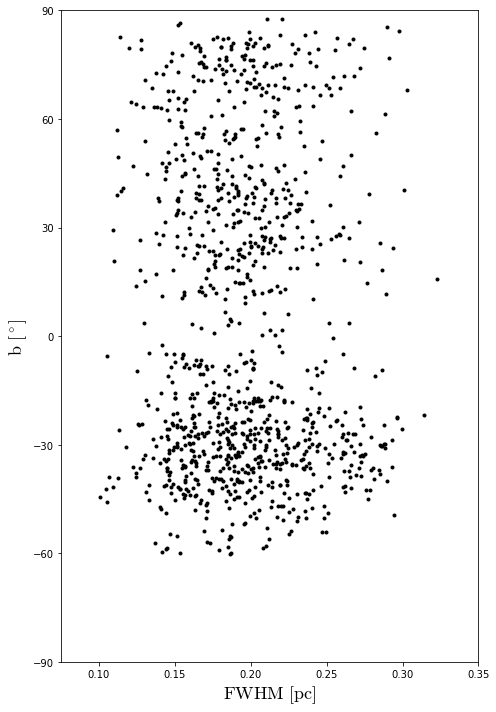

In [340]:
fig_width_b, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,10))

ax.scatter(width_fits_raw, bs, marker='.', color='black')

ax.set_ylabel(r'$\mathrm{b}\ [^\circ]$', fontsize=18)
ax.set_xlabel(r'$\mathrm{FWHM\ [pc]}$', fontsize=18)

ax.set_ylim([-90, 90])
ax.set_xlim([0.075, 0.35]) # consistent with histograms

ax.set_yticks(np.linspace(-90, 90, 7))
#ax.set_xticks(np.arange(0.1, 0.65, .1))

fig_width_b.tight_layout()
fig_width_b.show()

In [341]:
fig_width_b.savefig('../../vis/all_sky_maps_fourth_batch/FWHM_vs_b.pdf')

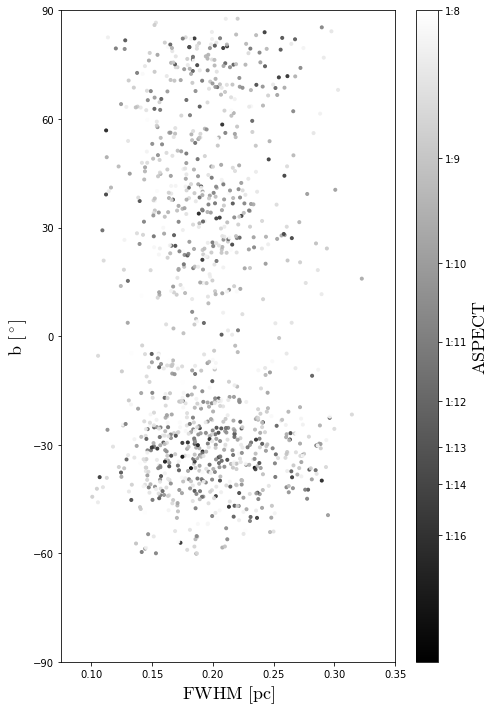

In [342]:
fig_width_b, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,10))

ax.scatter(width_fits_raw, bs, marker='.', cmap='binary_r', alpha=.9,
           c=roundnesses, norm=plt.Normalize(vmin=min(roundnesses), vmax=AR2ROUND['1_8']))
sm = plt.cm.ScalarMappable(cmap='binary_r',
                           norm=plt.Normalize(vmin=min(roundnesses), vmax=AR2ROUND['1_8']))
sm._A = []
cbar = fig_width_b.colorbar(sm, ax=ax, ticks = sorted(list(AR2ROUND.values()), reverse=True),
                                aspect=30, shrink=1)
cbar.ax.set_yticklabels(['1:8','1:9','1:10','1:11','1:12','1:13','1:14','1:16'])
cbar.set_label(r'$\mathrm{ASPECT}$', fontsize=18)

ax.set_ylabel(r'$\mathrm{b}\ [^\circ]$', fontsize=18)
ax.set_xlabel(r'$\mathrm{FWHM\ [pc]}$', fontsize=18)

ax.set_ylim([-90, 90])
ax.set_xlim([0.075, 0.35]) # consistent with histograms

ax.set_yticks(np.linspace(-90, 90, 7))
#ax.set_xticks(np.arange(0.1, 0.65, .1))

fig_width_b.tight_layout()
fig_width_b.show()

In [343]:
fig_width_b.savefig('../../vis/all_sky_maps_fourth_batch/FWHM_vs_b_color_by_AR.pdf')

### width & l

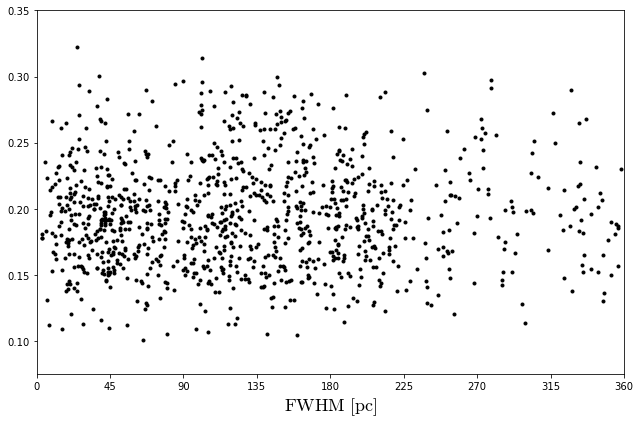

In [344]:
fig_width_l, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))

ax.scatter(ls, width_fits_raw, marker='.', color='black')

ax.set_xlabel(r'$\mathrm{l\ } [^\circ]$', fontsize=18)
ax.set_xlabel(r'$\mathrm{FWHM\ [pc]}$', fontsize=18)

ax.set_xlim([0, 360])
ax.set_ylim([0.075, 0.35]) # consistent with histograms

ax.set_xticks(np.linspace(0, 360, 9))

fig_width_l.tight_layout()
fig_width_l.show()

In [345]:
fig_width_l.savefig('../../vis/all_sky_maps_fourth_batch/FWHM_vs_l.pdf')

### width & column density

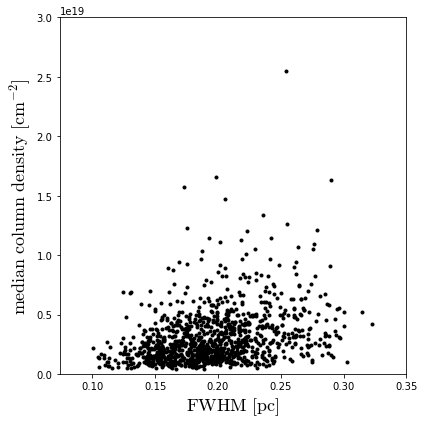

In [346]:
fig_width_column_d, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

ax.scatter(width_fits_raw, column_density_medians_raw, marker='.', color='black')

ax.set_ylabel(r'$\mathrm{median\ column\ density\ [cm^{-2}]}$', fontsize=18)
ax.set_xlabel(r'$\mathrm{FWHM\ [pc]}$', fontsize=18)

ax.set_ylim(0, 3e19)
ax.set_xlim([0.074, 0.35]) # consistent with histograms


fig_width_column_d.tight_layout()
fig_width_column_d.show()

In [347]:
fig_width_column_d.savefig('../../vis/all_sky_maps_fourth_batch/FWHM_vs_median_column.pdf')

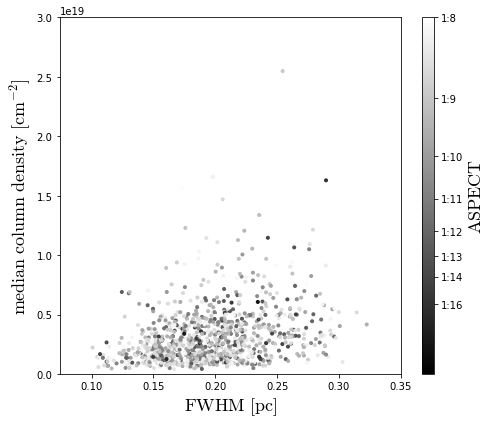

In [348]:
fig_width_column_d, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,6))

ax.scatter(width_fits_raw, column_density_medians_raw, marker='.', cmap='binary_r',
           c=roundnesses, norm=plt.Normalize(vmin=min(roundnesses), vmax=AR2ROUND['1_8']), alpha=.9)
sm = plt.cm.ScalarMappable(cmap='binary_r',
                           norm=plt.Normalize(vmin=min(roundnesses), vmax=AR2ROUND['1_8']))
sm._A = []
cbar = fig_width_column_d.colorbar(sm, ax=ax, ticks = sorted(list(AR2ROUND.values()), reverse=True),
                                aspect=30, shrink=1)
cbar.ax.set_yticklabels(['1:8','1:9','1:10','1:11','1:12','1:13','1:14','1:16'])
cbar.set_label(r'$\mathrm{ASPECT}$', fontsize=18)

ax.set_ylabel(r'$\mathrm{median\ column\ density\ [cm^{-2}]}$', fontsize=18)
ax.set_xlabel(r'$\mathrm{FWHM\ [pc]}$', fontsize=18)

ax.set_ylim(0, 3e19)
ax.set_xlim([0.074, 0.35]) # consistent with histograms


fig_width_column_d.tight_layout()
fig_width_column_d.show()

### width vs v dispersion

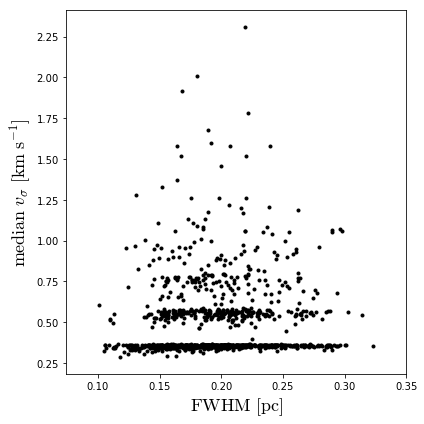

In [350]:
fig_width_v_disp, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

ax.scatter(width_fits_raw, moment_2_medians, marker='.', color='black')

ax.set_ylabel(r'$\mathrm{median\ }v_\sigma\ \mathrm{[km\ s^{-1}]}$', fontsize=18)
ax.set_xlabel(r'$\mathrm{FWHM\ [pc]}$', fontsize=18)

#ax.set_ylim(0.4)
ax.set_xlim([0.074, 0.35]) # consistent with histograms


fig_width_column_d.tight_layout()
fig_width_column_d.show()

fig_width_v_disp.tight_layout()
fig_width_v_disp.show()

In [351]:
fig_width_v_disp.savefig('../../vis/all_sky_maps_fourth_batch/FWHM_vs_median_v_dispersion.pdf')

### width & median velocity

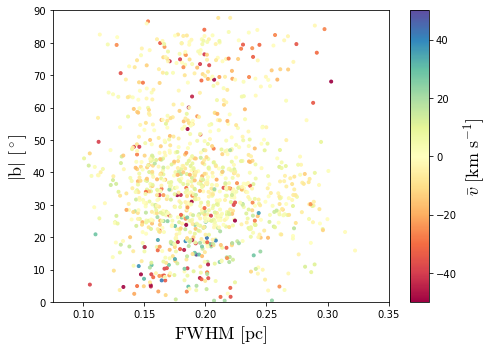

In [352]:
fig_width_mean_v, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
max_v = np.max(np.abs(moment_1_means))
ax.scatter(width_fits_raw, abs(bs), marker='.', cmap='Spectral', alpha=.9,
           c=moment_1_means, norm=plt.Normalize(vmin=-max_v, vmax=max_v))

sm = plt.cm.ScalarMappable(cmap='Spectral',
                           norm=plt.Normalize(vmin=-max_v, vmax=max_v))
sm._A = []
cbar = fig_width_mean_v.colorbar(sm, ax=ax, aspect=15, shrink=1)
cbar.set_label(r'$\barv\ \mathrm{[km\ s^{-1}]}$', fontsize=18)

ax.set_xlabel(r'$\mathrm{FWHM\ [pc]}$', fontsize=18)
ax.set_ylabel(r'$\mathrm{|b|}\ [^\circ]$', fontsize=18)

ax.set_ylim(0, 90)
ax.set_xlim([0.075, 0.35]) # consistent with histograms


fig_width_mean_v.tight_layout()
fig_width_mean_v.show()

In [360]:
fig_width_mean_v.savefig('../../vis/all_sky_maps_fourth_batch/FWHM_vs_abs_b_color_by_mean_v.pdf')

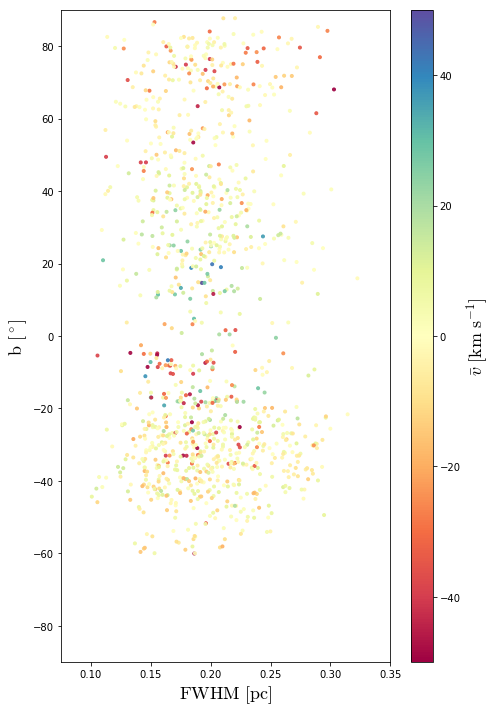

In [354]:
fig_width_median_v, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,10))
max_v = np.max(np.abs(moment_1_means))
ax.scatter(width_fits_raw, bs, marker='.', cmap='Spectral', alpha=.9,
           c=moment_1_means, norm=plt.Normalize(vmin=-max_v, vmax=max_v))

sm = plt.cm.ScalarMappable(cmap='Spectral',
                           norm=plt.Normalize(vmin=-max_v, vmax=max_v))
sm._A = []
cbar = fig_width_median_v.colorbar(sm, ax=ax, aspect=30, shrink=1)
cbar.set_label(r'$\barv\ \mathrm{[km\ s^{-1}]}$', fontsize=18)

ax.set_xlabel(r'$\mathrm{FWHM\ [pc]}$', fontsize=18)
ax.set_ylabel(r'$\mathrm{b}\ [^\circ]$', fontsize=18)

ax.set_ylim(-90, 90)
ax.set_xlim([0.075, 0.35]) # consistent with histograms


fig_width_median_v.tight_layout()
fig_width_median_v.show()

In [355]:
fig_width_median_v.savefig('../../vis/all_sky_maps_fourth_batch/FWHM_vs_b_color_by_mean_v.pdf')

### column density & b

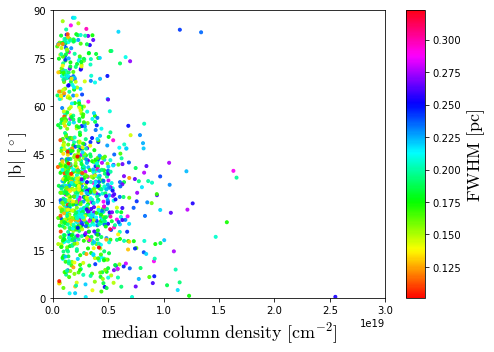

In [356]:
fig_column_d_b_abs, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))

ax.scatter(column_density_medians_raw, np.abs(bs), c=width_fits_raw,
           marker='.', cmap='hsv', edgecolors='face', alpha=.9)

sm = plt.cm.ScalarMappable(cmap='hsv',
                           norm=plt.Normalize(vmin=min(width_fits_raw), vmax=max(width_fits_raw)))
sm._A = []
cbar = fig_column_d_b_abs.colorbar(sm, ax=ax, aspect=15, shrink=1)
cbar.set_label(r'$\mathrm{FWHM\ [pc]}$', fontsize=18)

ax.set_ylabel(r'$\mathrm{|b|}\ [^\circ]$', fontsize=18)
ax.set_xlabel(r'$\mathrm{median\ column\ density\ [cm^{-2}]}$', fontsize=18)

ax.set_ylim([0, 90])
ax.set_xlim([0, 3e19]) # consistent with histograms

ax.set_yticks(np.arange(0, 90.1, 15))

fig_column_d_b_abs.tight_layout()
fig_column_d_b_abs.show()

In [357]:
fig_column_d_b_abs.savefig('../vis/all_sky_maps_fin/column_density_b_abs.pdf')

IOError: [Errno 2] No such file or directory: '../vis/all_sky_maps_fin/column_density_b_abs.pdf'

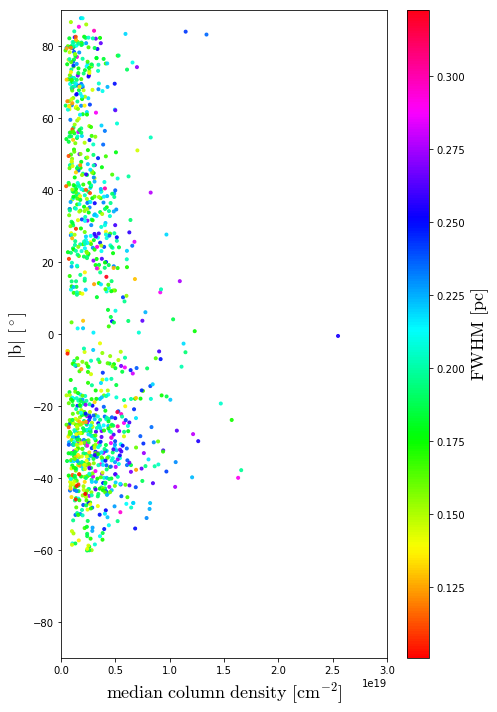

In [358]:
fig_column_d_b, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,10))

ax.scatter(column_density_medians_raw, bs, c=width_fits_raw,
           marker='.', cmap='hsv', edgecolors='face', alpha=.9)

sm = plt.cm.ScalarMappable(cmap='hsv',
                           norm=plt.Normalize(vmin=min(width_fits_raw), vmax=max(width_fits_raw)))
sm._A = []
cbar = fig_column_d_b.colorbar(sm, ax=ax, aspect=30, shrink=1)
cbar.set_label(r'$\mathrm{FWHM\ [pc]}$', fontsize=18)

ax.set_ylabel(r'$\mathrm{|b|}\ [^\circ]$', fontsize=18)
ax.set_xlabel(r'$\mathrm{median\ column\ density\ [cm^{-2}]}$', fontsize=18)

ax.set_ylim([-90, 90])
ax.set_xlim([0, 3e19]) # consistent with histograms


fig_column_d_b.tight_layout()
fig_column_d_b.show()

In [359]:
fig_column_d_b.savefig('../vis/all_sky_maps_fin/column_density_b.pdf')

IOError: [Errno 2] No such file or directory: '../vis/all_sky_maps_fin/column_density_b.pdf'

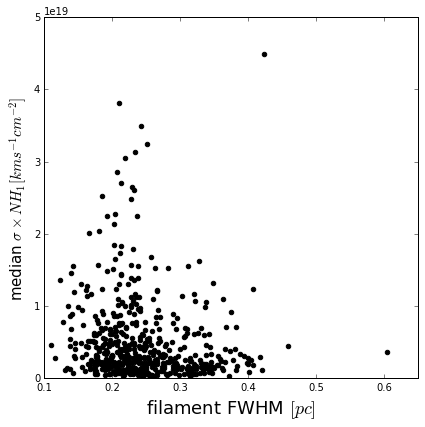

In [266]:
fig_width_v_disp_c, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

ax.scatter(fwhm, m2_median*column_d_median, marker='o', color='black')

ax.set_ylabel(r'median $ \sigma \times NH_1[kms^{-1}cm^{-2}]$', fontsize=15)
ax.set_xlabel(r'filament FWHM $[pc]$', fontsize=18)

ax.set_ylim(0,.5e20)
ax.set_xlim([0.1, 0.65]) # consistent with histograms

ax.set_xticks(np.arange(0.1, 0.65, .1))

fig_width_v_disp_c.tight_layout()
fig_width_v_disp_c.show()